In [2]:
# Importar las librerias que correspondan. 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
# 2. Carga de Datos.

vinosred = pd.read_csv('winequality-red.csv', sep=";")
vinoswhite = pd.read_csv('winequality-white.csv', sep=";")


In [4]:
bd = pd.concat([vinosred, vinoswhite])

In [5]:
# 4. Se agrega la columna "Tipo_Vino" y se concatena, despues se muestra. 

# Agregar una columna "Tipo_Vino" a cada conjunto de datos
vinosred['Tipo_Vino'] = 'red'
vinoswhite['Tipo_Vino'] = 'white'

# Concatenar los dos conjuntos de datos en uno solo
bd = pd.concat([vinoswhite, vinosred])

# Mostrar el conjunto de datos resultante
print(bd.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality Tipo_Vino  
0      8.8        6     white  
1      9.5        6   

In [6]:
# 5. Dscripción estadistica del DataFrame. 

print(bd.describe) - print(bd.describe())

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [7]:
# 6. Imprimir el nombre de las columnas. 

print(bd.columns) 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Tipo_Vino'],
      dtype='object')


In [8]:
# 7. Imprimir la información detallada del DataFrame 

print(bd.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Tipo_Vino             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


In [10]:
# 9. Filtro solamente las columnas que quiero trabajar. 

bd = bd.loc[:, ["Tipo_Vino","residual sugar", "alcohol", "density"]]
print(bd)

     Tipo_Vino  residual sugar  alcohol  density
0        white            20.7      8.8  1.00100
1        white             1.6      9.5  0.99400
2        white             6.9     10.1  0.99510
3        white             8.5      9.9  0.99560
4        white             8.5      9.9  0.99560
...        ...             ...      ...      ...
1594       red             2.0     10.5  0.99490
1595       red             2.2     11.2  0.99512
1596       red             2.3     11.0  0.99574
1597       red             2.0     10.2  0.99547
1598       red             3.6     11.0  0.99549

[6497 rows x 4 columns]


In [11]:
# 10. Promedio o la media de la densidad - DATA WRANGLING.

densidad = bd['density'].astype('float').mean(axis=0) 
print("Promedio de densidad:", densidad) 

Promedio de densidad: 0.9946966338309989


In [12]:
# 11. Moda o dato que mas se repite - DATA WRANGLING 

bd['Tipo_Vino'].value_counts().idxmax() 

'white'

In [13]:
# 12. Agrupación de los datos en el DataFrame

datos_agrupados = bd.groupby(['Tipo_Vino', 'alcohol']).size().reset_index(name='count')
print(datos_agrupados)


    Tipo_Vino  alcohol  count
0         red     8.40      2
1         red     8.50      1
2         red     8.70      2
3         red     8.80      2
4         red     9.00     30
..        ...      ...    ...
163     white    13.80      2
164     white    13.90      3
165     white    14.00      5
166     white    14.05      1
167     white    14.20      1

[168 rows x 3 columns]


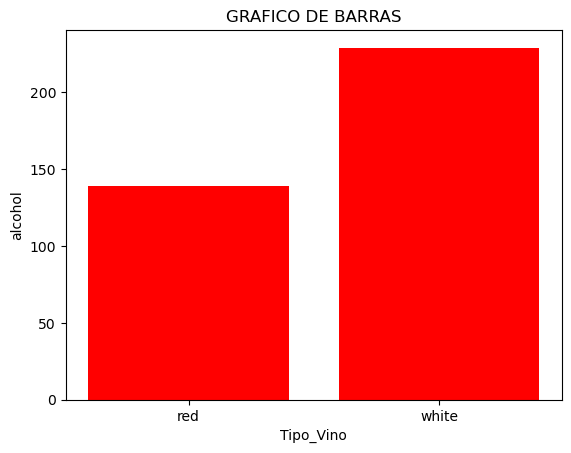

In [15]:
# 13. Creación de grafico de barras. 

plt.bar(datos_agrupados['Tipo_Vino'], datos_agrupados['count'], color='red')
plt.xlabel('Tipo_Vino')
plt.ylabel('alcohol')
plt.title('GRAFICO DE BARRAS')
plt.show()

In [16]:
# 14. Me muestra la correlacion entre densidad del azucar y el residual.

bd[['residual sugar', 'density']].corr() 

,residual sugar,density
residual sugar,1.000000,0.552517
density,0.552517,1.000000
